In [1]:
#First let's open the simulation file

import pickle

with open('Simulation.pkl', 'rb') as infile:
  data = pickle.load(infile)

In [2]:
#Let's look at the variables contained in the dataset

for variable_name in list(data):
  print(variable_name)

Distance to closest cosmic ray track
Length of lepton track
Distance to longest track
Simulation category
Topological muon ML score
End position of lepton track x component
End position of lepton track y component
End position of lepton track z component
Track vs shower ML score
Particle ID LLh
Start position of lepton track x component
Start position of lepton track y component
Start position of lepton track z component
Interaction vertex position x component
Interaction vertex position y component
Interaction vertex position z component
Total energy
Subevent
Muon momenutm (length estimate)
Muon momenutm (scattering estimate)
Simulation weight
Simulated neutrino energy
Simulated neutrino flight distance
Simulated muon momentum


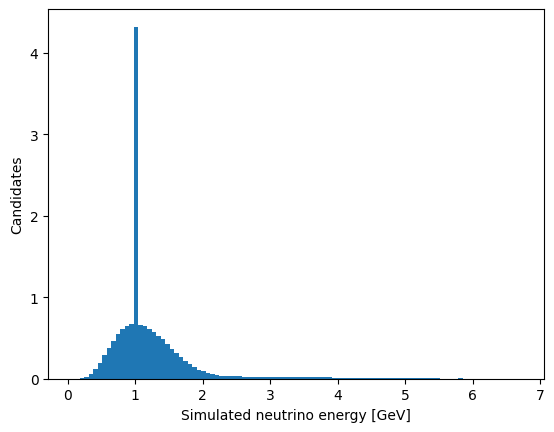

In [3]:
#We can plot, for example, the simulated energy for the neutrino

from matplotlib import pyplot as plt 
plt.hist(data['Simulated neutrino energy'], bins=100, density=True)
plt.xlabel('Simulated neutrino energy [GeV]')
plt.ylabel('Candidates')
plt.show()

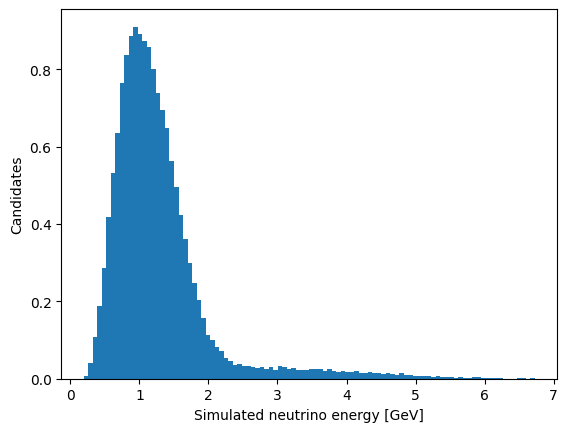

In [4]:
#This has some strange features. That's because the simulation contains more
#than one type of simulated process. We can select our signal in the simulation
#by using the "Simulation category" variable. When that is 21, it is a muon
#neutrino charge current interaction

plt.hist(data[(data['Simulation category'] == 21)]['Simulated neutrino energy'], bins=100, density=True)
plt.xlabel('Simulated neutrino energy [GeV]')
plt.ylabel('Candidates')
plt.show()

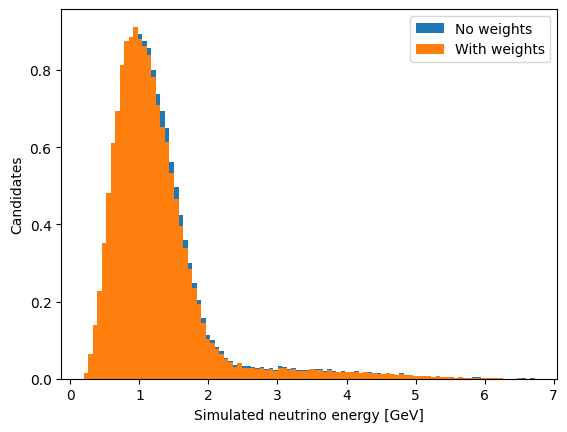

In [5]:
#This is one more thing to note before this plot is correct. The simulation is
#not a perfect representation of reality. Sometimes too many events were
#created in some region of the parameter space, sometimes too few. This is true
#in our case. We can correct for this, by making events in overpopulated regions
#contribute less, and in under populated regions contribute more. Each event is
#given a "weight" that represents its relative contriubution. The number of interactions
#is then the sum of the weights not the sum of the entries. When processing this data
#we must take into account these weights. For example, the above plot should be

plt.hist(data[(data['Simulation category'] == 21)]['Simulated neutrino energy'], bins=100, density=True, label='No weights')
plt.hist(data[(data['Simulation category'] == 21)]['Simulated neutrino energy'], bins=100, density=True, weights=data[data['Simulation category'] == 21]['Simulation weight'], label='With weights')
plt.xlabel('Simulated neutrino energy [GeV]')
plt.ylabel('Candidates')
plt.legend()
plt.show()